In [231]:
import warnings
warnings.filterwarnings("ignore")

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ## Step 1: Load the Dataset



In [234]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [235]:
# Display dataset information
print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Dataset Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000    

# ## Step 2: Data Preprocessing

In [237]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())



Missing Values in Dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [238]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


# no duplicate rows

In [240]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [241]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [242]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k=6)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = np.array(X.columns)[selector.get_support()]
print("\nSelected Features:", selected_features)



Selected Features: ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Latitude' 'Longitude']


# ## Step 3: Implementing Regression Models

In [244]:
# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}


# ## Step 4: Training and Evaluating Models

In [246]:
# Dictionary to store model evaluation results
results = {}


In [247]:
# Loop through each model, train and evaluate it
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_selected, y_train)  # Train model
    y_pred = model.predict(X_test_selected)  # Make predictions
     # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}
    
    # Print results for each model
    print(f"{name} - MSE: {mse}, MAE: {mae}, R2 Score: {r2}")



Training Linear Regression...
Linear Regression - MSE: 0.5569639378550825, MAE: 0.5339676558382765, R2 Score: 0.5749693819995387

Training Decision Tree Regressor...
Decision Tree Regressor - MSE: 0.5189946088896075, MAE: 0.4571799006782946, R2 Score: 0.6039445566175006

Training Random Forest Regressor...
Random Forest Regressor - MSE: 0.25858680231650105, MAE: 0.33221759789244193, R2 Score: 0.8026671011796414

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - MSE: 0.32670203845962154, MAE: 0.39381989692486347, R2 Score: 0.750686965760729

Training Support Vector Regressor...
Support Vector Regressor - MSE: 0.4170222184201856, MAE: 0.42464260230331163, R2 Score: 0.6817617817454222


# ## Step 5: Model Comparison

In [249]:

# Convert results dictionary into a DataFrame for easy visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)




Model Performance Comparison:
                                  MSE       MAE  R2 Score
Linear Regression            0.556964  0.533968  0.574969
Decision Tree Regressor      0.518995  0.457180  0.603945
Random Forest Regressor      0.258587  0.332218  0.802667
Gradient Boosting Regressor  0.326702  0.393820  0.750687
Support Vector Regressor     0.417022  0.424643  0.681762


In [250]:
# Identifying the best and worst performing models based on R² score
best_model = results_df['R2 Score'].idxmax()
worst_model = results_df['R2 Score'].idxmin()

print(f"\nBest Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")



Best Performing Model: Random Forest Regressor
Worst Performing Model: Linear Regression


# ## Step 6: Visualizing Model Performance

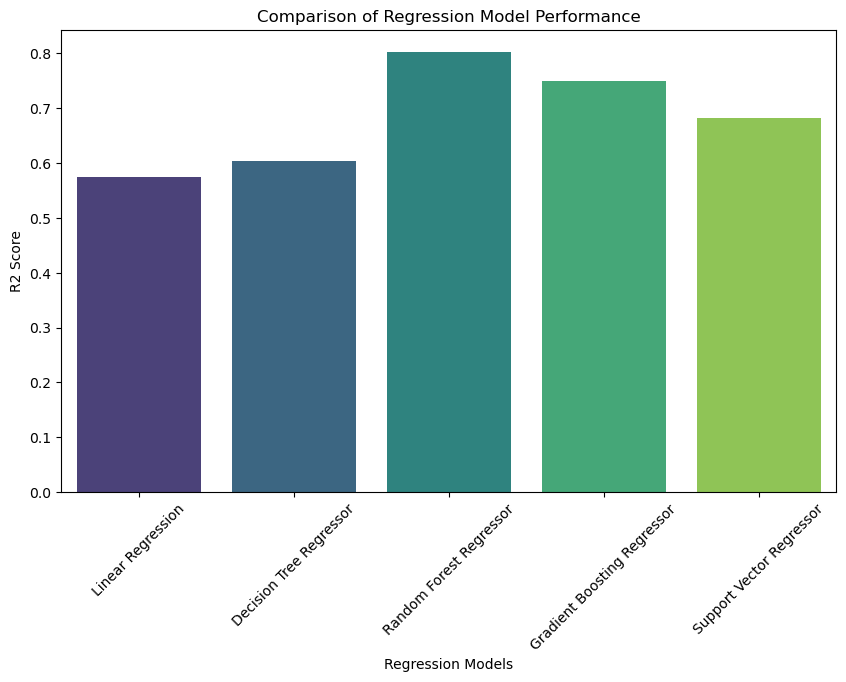

In [252]:
# Create a bar plot to compare model performances
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df['R2 Score'], palette='viridis')
plt.xlabel("Regression Models")
plt.ylabel("R2 Score")
plt.title("Comparison of Regression Model Performance")
plt.xticks(rotation=45)
plt.show()
